# Part II - # Part I - LOAN PROSPER RATING ANALYSIS
## by John Aihie

## Investigation Overview


1. One of the finding shows that the debt to income ratio increases as monthly income also drops which shows that there is an inverse relation.
2. There exist an increasing trend in loan payment as the quarter increases for each year.
3. Among the highest earning profession includes doctor, judge, pharmacist etc and the least earning occupation includes students
4. As the income range increases the loan payment also increases




## Dataset Overview

> The data used for this analysis was gotten from kaggle through this [link](https://www.kaggle.com/code/zeadomar/preliminary-eda-of-prosper-loan/data)

> The data tends to investigate the prosper rating of loan.

In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("max_column", 29)

plt.style.use("seaborn-colorblind")
sns.set(rc={"figure.figsize":(8,8)})
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("prosperLoanData_clean.csv")

## Relationship between Monthly income and debt to income ratio

> Has the debt to income ratio increases the monthly income also drops


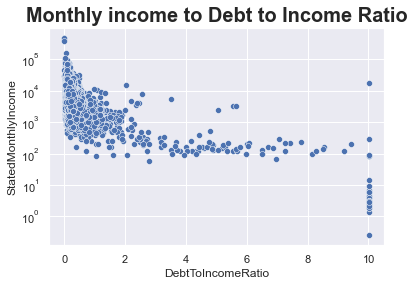

In [7]:
sns.scatterplot(data=df, x="DebtToIncomeRatio", y="StatedMonthlyIncome")
plt.yscale("log")
plt.title("Monthly income to Debt to Income Ratio", size=20, weight="bold");

## Quarterly Trend of loan payment

> There exist an increasing trend in loan payment as the quarter increases for each year

In [4]:
index_LoanOriginationQuarter_sorted = df["LoanOriginationQuarter"].str.split(" ", expand=True).sort_values([1, 0]).index

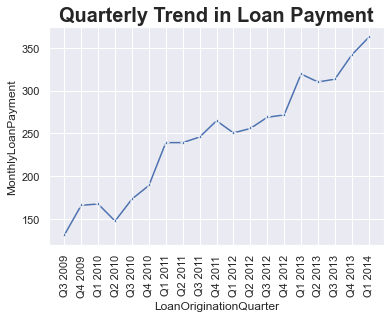

In [8]:
sns.lineplot(data=df.loc[index_LoanOriginationQuarter_sorted, :], x="LoanOriginationQuarter", y="MonthlyLoanPayment", ci=None, sort=False, marker="*")
plt.xticks(rotation=90)
plt.title("Quarterly Trend in Loan Payment", size=20, weight="bold");

## Most viable profession for borrowing

> Among the highest earning profession includes doctor, judge, pharmacist etc and the least earning occupation includes students



In [9]:
sort = df[["Occupation", "MonthlyLoanPayment"]].groupby("Occupation").mean().sort_values("MonthlyLoanPayment", ascending=False).index

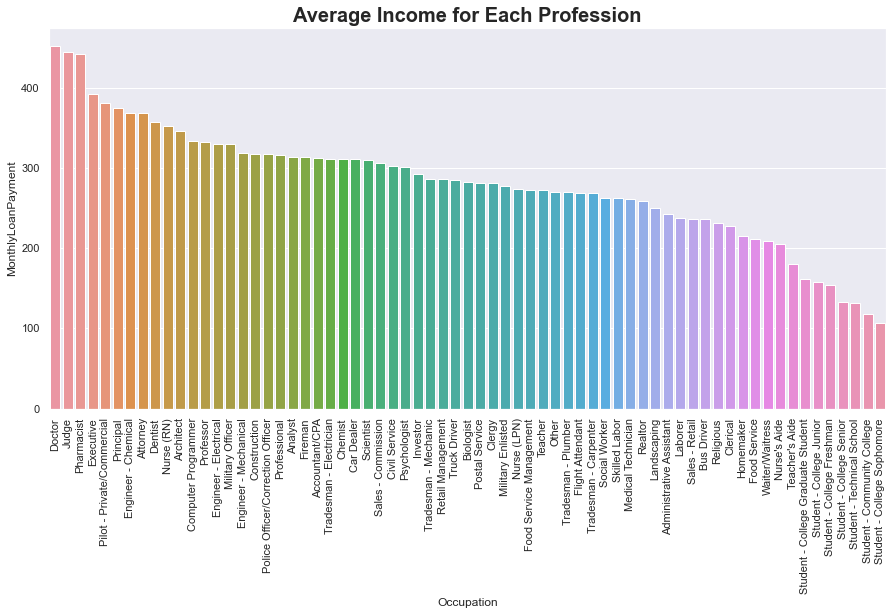

In [10]:
plt.figure(figsize=(15,7))
sns.barplot(data=df, x="Occupation", y="MonthlyLoanPayment", estimator=np.mean, ci=None, order=sort)
plt.xticks(rotation=90)
plt.title("Average Income for Each Profession", size=20, weight="bold");

## Effect of income range on the relationship between income and loan payment

> As the income range increases the loan payment also increases



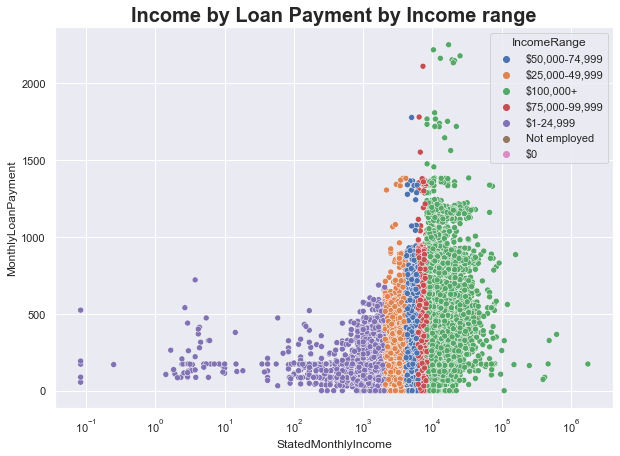

In [11]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x="StatedMonthlyIncome", y="MonthlyLoanPayment", hue="IncomeRange")
plt.xscale("log")
plt.title("Income by Loan Payment by Income range", size=20, weight="bold");